In [513]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [514]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [661]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from numpy import cov
from scipy.stats import pearsonr

In [515]:
df = pd.read_csv(r"C:\Users\Maciek\Downloads\archive (1)\tripadvisor_european_restaurants.csv", low_memory = False)
df.sample()

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
999991,g189112-d13350039,Ti Gracinda,"[""Europe"", ""Portugal"", ""Algarve"", ""Faro Distri...",Portugal,Algarve,Faro District,Albufeira,"Tv. dos Telheiros 2B, Albufeira 8200-212 Portugal",37.08838,-8.249867,...,23.0,4.0,0.0,1.0,1.0,4.0,4.0,4.0,NaN,NaN


In [516]:
df = df[df.country == 'Poland']

In [517]:
df.isna().sum()

restaurant_link                          0
restaurant_name                          0
original_location                        0
country                                  0
region                                   0
province                                 1
city                                 24698
address                                  0
latitude                               802
longitude                              802
claimed                                 53
awards                               21081
popularity_detailed                   3864
popularity_generic                    3921
top_tags                              3636
price_level                           8670
price_range                          15954
meals                                11974
cuisines                              5665
special_diets                        21167
features                             20896
vegetarian_friendly                      0
vegan_options                            0
gluten_free

In [518]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24698 entries, 886009 to 910706
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   restaurant_link                    24698 non-null  object 
 1   restaurant_name                    24698 non-null  object 
 2   original_location                  24698 non-null  object 
 3   country                            24698 non-null  object 
 4   region                             24698 non-null  object 
 5   province                           24697 non-null  object 
 6   city                               0 non-null      object 
 7   address                            24698 non-null  object 
 8   latitude                           23896 non-null  float64
 9   longitude                          23896 non-null  float64
 10  claimed                            24645 non-null  object 
 11  awards                             3617 non-null

In [519]:
df = df.drop(columns = "region")

In [520]:
df = df.drop(columns = "country")

In [521]:
df = df.drop(columns = "restaurant_name")

In [522]:
df = df.drop(columns = "original_location")

In [523]:
df = df.drop(columns = "province")

In [524]:
df = df.drop(columns = "city")

In [525]:
df = df.drop(columns = "address")

In [526]:
df = df.drop(columns = "restaurant_link")

In [527]:
df = df.drop(columns = "default_language")

In [528]:
df = df.drop(columns = "keywords")

In [529]:
df = df.drop(columns = "latitude")

In [530]:
df = df.drop(columns = "longitude")

In [531]:
df = df.drop(columns = "original_open_hours")

In [532]:
df = df.drop(columns = "popularity_detailed")

In [533]:
df = df.drop(columns = "popularity_generic")

In [534]:
df = df.drop(columns = "meals")

In [535]:
df = df.drop(columns = "cuisines")

In [536]:
df = df.drop(columns = "reviews_count_in_default_language")

In [537]:
df = df.drop(columns = "total_reviews_count")

In [538]:
df = df.drop(columns = "price_range")

In [539]:
df = df.drop(columns = "atmosphere")

In [540]:
df = df.drop(columns = "awards")

In [541]:
df = df.drop(columns = "top_tags")

In [542]:
df = df.drop(columns = "special_diets")

In [543]:
df = df.drop(columns = "features")

In [544]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24698 entries, 886009 to 910706
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claimed                  24645 non-null  object 
 1   price_level              16028 non-null  object 
 2   vegetarian_friendly      24698 non-null  object 
 3   vegan_options            24698 non-null  object 
 4   gluten_free              24698 non-null  object 
 5   open_days_per_week       13374 non-null  float64
 6   open_hours_per_week      13374 non-null  float64
 7   working_shifts_per_week  13374 non-null  float64
 8   avg_rating               20760 non-null  float64
 9   excellent                20778 non-null  float64
 10  very_good                20778 non-null  float64
 11  average                  20778 non-null  float64
 12  poor                     20778 non-null  float64
 13  terrible                 20778 non-null  float64
 14  food            

In [545]:
df['vegetarian_friendly'] = df['vegetarian_friendly'].replace(['N', 'Y'], [0, 1])

In [546]:
df['vegan_options'] = df['vegan_options'].replace(['N', 'Y'], [0, 1])

In [547]:
df['gluten_free'] = df['gluten_free'].replace(['N', 'Y'], [0, 1])

In [548]:
df['claimed'] = df['claimed'].fillna(0)

In [549]:
df['price_level'] = df['price_level'].fillna(0)

In [550]:
df['price_level'].value_counts()

€€-€€€    8976
0         8670
€         6710
€€€€       342
Name: price_level, dtype: int64

In [551]:
df['price_level'] = df['price_level'].replace(['€', '€€-€€€','€€€€'], [0, 1, 2])

In [552]:
df['open_days_per_week'] = df['open_days_per_week'].fillna(7)

In [553]:
df['working_shifts_per_week'] = df['working_shifts_per_week'].fillna(9)

In [554]:
df['open_hours_per_week'] = df['open_hours_per_week'].fillna(56)

In [555]:
df['excellent'] = df['excellent'].fillna(0)

In [556]:
df['very_good'] = df['very_good'].fillna(0)

In [557]:
df['average'] = df['average'].fillna(0)

In [558]:
df['poor'] = df['poor'].fillna(0)

In [559]:
df['terrible'] = df['terrible'].fillna(0)

In [560]:
df['food'] = df['food'].fillna(0)

In [561]:
df['service'] = df['service'].fillna(0)

In [562]:
df['value'] = df['value'].fillna(0)

In [563]:
df['claimed'] = df['claimed'].replace(['Unclaimed', 'Claimed'], [0, 1])

In [567]:
df.avg_rating.mean()

4.109489402697495

In [568]:
df['avg_rating'] = df['avg_rating'].fillna(4.109489402697495/2)

In [569]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24698 entries, 886009 to 910706
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claimed                  24698 non-null  int64  
 1   price_level              24698 non-null  int64  
 2   vegetarian_friendly      24698 non-null  int64  
 3   vegan_options            24698 non-null  int64  
 4   gluten_free              24698 non-null  int64  
 5   open_days_per_week       24698 non-null  float64
 6   open_hours_per_week      24698 non-null  float64
 7   working_shifts_per_week  24698 non-null  float64
 8   avg_rating               24698 non-null  float64
 9   excellent                24698 non-null  float64
 10  very_good                24698 non-null  float64
 11  average                  24698 non-null  float64
 12  poor                     24698 non-null  float64
 13  terrible                 24698 non-null  float64
 14  food            

In [573]:
df.describe().transpose()[['mean', 'std', 'min', 'max']]

,mean,std,min,max
claimed,0.375658,0.484302,0.0,1.000000
price_level,0.391125,0.515608,0.0,2.000000
vegetarian_friendly,0.139404,0.346375,0.0,1.000000
vegan_options,0.058831,0.235312,0.0,1.000000
gluten_free,0.031582,0.174887,0.0,1.000000
open_days_per_week,6.852782,0.551613,1.0,7.000000
open_hours_per_week,67.513497,24.131297,0.0,167.883333
working_shifts_per_week,7.794599,1.289164,1.0,14.000000
avg_rating,3.781868,1.001736,1.0,5.000000
excellent,8.498502,45.176975,0.0,3120.000000


<AxesSubplot:xlabel='claimed'>

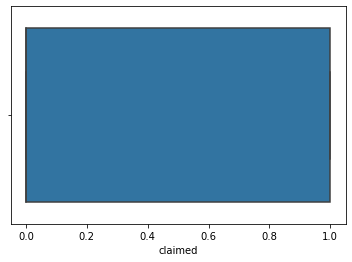

In [577]:
sns.boxplot(x=df['claimed'])

<AxesSubplot:xlabel='price_level'>

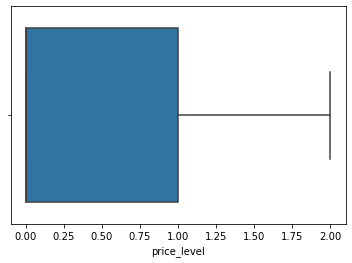

In [578]:
sns.boxplot(x=df['price_level'])

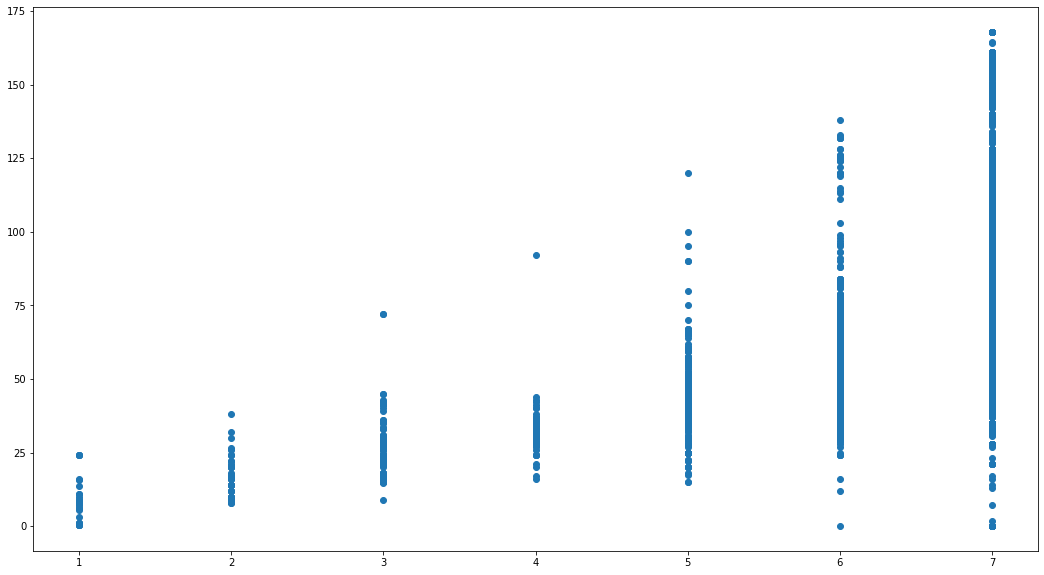

In [579]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df['open_days_per_week'], df['open_hours_per_week'])

<AxesSubplot:xlabel='working_shifts_per_week'>

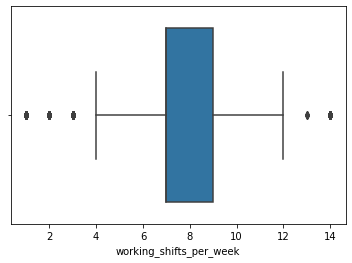

In [580]:
sns.boxplot(x=df['working_shifts_per_week'])

<AxesSubplot:xlabel='avg_rating'>

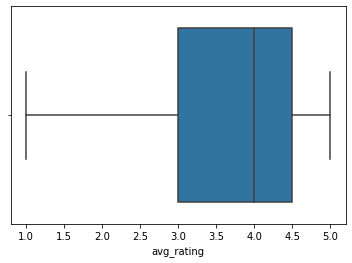

In [581]:
sns.boxplot(x=df['avg_rating'])

<AxesSubplot:xlabel='excellent'>

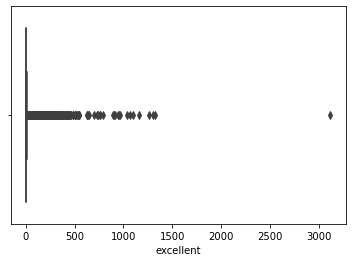

In [582]:
sns.boxplot(x=df['excellent'])

<AxesSubplot:xlabel='very_good'>

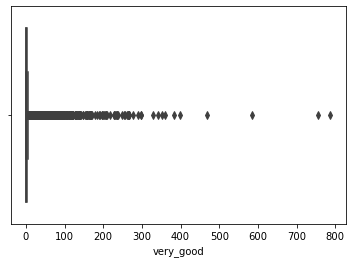

In [583]:
sns.boxplot(x=df['very_good'])

<AxesSubplot:xlabel='average'>

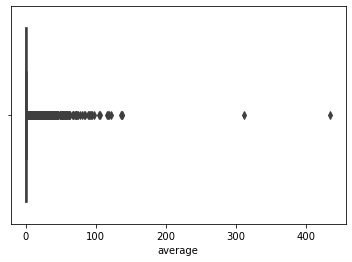

In [584]:
sns.boxplot(x=df['average'])

<AxesSubplot:xlabel='poor'>

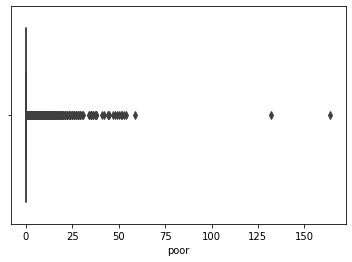

In [585]:
sns.boxplot(x=df['poor'])

<AxesSubplot:xlabel='terrible'>

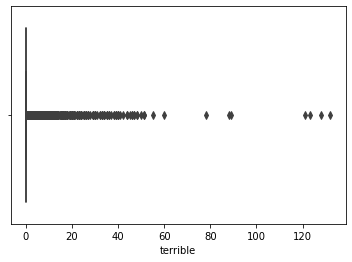

In [586]:
sns.boxplot(x=df['terrible'])

<AxesSubplot:xlabel='food'>

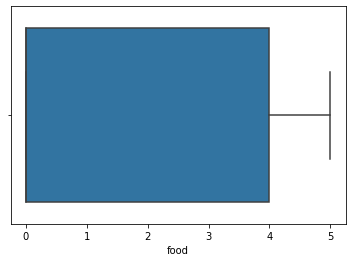

In [587]:
sns.boxplot(x=df['food'])

<AxesSubplot:xlabel='service'>

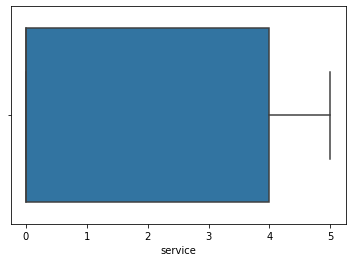

In [588]:
sns.boxplot(x=df['service'])

<AxesSubplot:xlabel='value'>

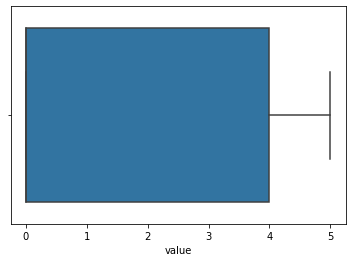

In [589]:
sns.boxplot(x=df['value'])

In [591]:
cluster = df

In [592]:
mms = MinMaxScaler()
mms.fit(cluster)
data_transformed = mms.transform(cluster)

In [597]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

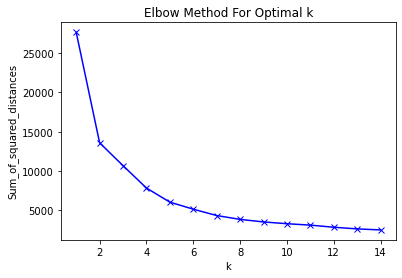

In [598]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [616]:
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

In [617]:
model = KMeans(n_clusters=2)
model.fit(X)

KMeans(n_clusters=2)

In [618]:
yhat = model.predict(X)
clusters = unique(yhat)

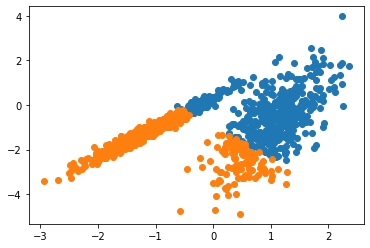

In [619]:
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()

In [667]:
pear, _ =  pearsonr(df.avg_rating, df.claimed)

In [668]:
print(pear)

0.26849398078191256


In [669]:
pear, _ =  pearsonr(df.avg_rating, df.price_level)

In [670]:
print(pear)

0.20351258296287972


In [671]:
pear, _ =  pearsonr(df.avg_rating, df.vegetarian_friendly)

In [672]:
print(pear)

0.18230732451365278


In [673]:
pear, _ =  pearsonr(df.avg_rating, df.vegan_options)

In [674]:
print(pear)

0.1407207567915803


In [675]:
pear, _ =  pearsonr(df.avg_rating, df.gluten_free)

In [676]:
print(pear)

0.10776230260222618


In [677]:
pear, _ =  pearsonr(df.avg_rating, df.open_days_per_week)

In [678]:
print(pear)

-0.08531272277307349


In [679]:
pear, _ =  pearsonr(df.avg_rating, df.open_hours_per_week)

In [680]:
print(pear)

-0.1959115717325771


In [681]:
pear, _ =  pearsonr(df.avg_rating, df.working_shifts_per_week)

In [682]:
print(pear)

-0.11487516310817568


In [683]:
pear, _ =  pearsonr(df.avg_rating, df.excellent)

In [684]:
print(pear)

0.104891093261611


In [685]:
pear, _ =  pearsonr(df.avg_rating, df.very_good)

In [686]:
print(pear)

0.07826583524069713


In [687]:
pear, _ =  pearsonr(df.avg_rating, df.average)

In [688]:
print(pear)

0.04541742766669098


In [689]:
pear, _ =  pearsonr(df.avg_rating, df.poor)

In [690]:
print(pear)

0.02073421845377288


In [691]:
pear, _ =  pearsonr(df.avg_rating, df.terrible)

In [692]:
print(pear)

-0.028069473993855537


In [693]:
pear, _ =  pearsonr(df.avg_rating, df.food)

In [694]:
print(pear)

0.2996473700779129


In [695]:
pear, _ =  pearsonr(df.avg_rating, df.service)

In [696]:
print(pear)

0.2991681221982498


In [697]:
pear, _ =  pearsonr(df.avg_rating, df.value)

In [698]:
print(pear)

0.3020495451493288


In [699]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

In [700]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('avg_rating')
test_labels = test_features.pop('avg_rating')

In [701]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

In [702]:
print(normalizer.mean.numpy())

[3.7878329e-01 3.9093027e-01 1.4050005e-01 6.0279381e-02 3.2543778e-02
 6.8520598e+00 6.7443253e+01 7.7924385e+00 8.5532446e+00 3.7136855e+00
 1.3156190e+00 6.2577182e-01 7.5463104e-01 1.6960977e+00 1.7019688e+00
 1.6601629e+00]


In [703]:
first = np.array(train_features[:1])
with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

First example: [[ 1.   1.   1.   0.   0.   7.  56.   9.   5.   0.   0.   0.   0.   5.
   5.   4.5]]

Normalized: [[ 1.28  1.18  2.47 -0.25 -0.18  0.27 -0.48  0.93 -0.09 -0.22 -0.22 -0.24
  -0.25  1.59  1.59  1.39]]


In [713]:
def plot_loss(histpry):
    plt.plot(history.history['loss'], label = 'loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    #plt.ylim([0, 40])
    plt.ylim([0, 2])
    plt.xlabel('Epoch')
    plt.ylabel('Error ')
    plt.legend()
    plt.grid(True)

In [714]:
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    
    model.compile(
        #loss='mean_absolute_percentage_error',
        loss='mean_absolute_error',
        optimizer = tf.keras.optimizers.Adam(0.001))
    return model

In [715]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 16)                33        
_________________________________________________________________
dense_3 (Dense)              (None, 64)                1088      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 9,506
Trainable params: 9,473
Non-trainable params: 33
_________________________________________________________________


In [716]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split = 0.2,
    verbose=1, epochs = 100)

Epoch 1/100
494/494 [==============================] - 1s 761us/step - loss: 1.2084 - val_loss: 0.6469
Epoch 2/100
494/494 [==============================] - 0s 545us/step - loss: 0.6101 - val_loss: 0.5883
Epoch 3/100
494/494 [==============================] - 0s 552us/step - loss: 0.5754 - val_loss: 0.5658
Epoch 4/100
494/494 [==============================] - 0s 547us/step - loss: 0.5556 - val_loss: 0.5435
Epoch 5/100
494/494 [==============================] - 0s 547us/step - loss: 0.5196 - val_loss: 0.5660
Epoch 6/100
494/494 [==============================] - 0s 554us/step - loss: 0.5018 - val_loss: 0.4721
Epoch 7/100
494/494 [==============================] - 0s 554us/step - loss: 0.4573 - val_loss: 0.4060
Epoch 8/100
494/494 [==============================] - 0s 557us/step - loss: 0.3931 - val_loss: 0.3728
Epoch 9/100
494/494 [==============================] - 0s 561us/step - loss: 0.3749 - val_loss: 0.3861
Epoch 10/100
494/494 [==============================] - 0s 570us/step - l

Epoch 80/100
494/494 [==============================] - 0s 540us/step - loss: 0.1872 - val_loss: 0.2165
Epoch 81/100
494/494 [==============================] - 0s 553us/step - loss: 0.1913 - val_loss: 0.1986
Epoch 82/100
494/494 [==============================] - 0s 557us/step - loss: 0.1855 - val_loss: 0.2024
Epoch 83/100
494/494 [==============================] - 0s 560us/step - loss: 0.1965 - val_loss: 0.2303
Epoch 84/100
494/494 [==============================] - 0s 538us/step - loss: 0.1974 - val_loss: 0.1975
Epoch 85/100
494/494 [==============================] - 0s 552us/step - loss: 0.1881 - val_loss: 0.2105
Epoch 86/100
494/494 [==============================] - 0s 545us/step - loss: 0.1847 - val_loss: 0.1967
Epoch 87/100
494/494 [==============================] - 0s 545us/step - loss: 0.1819 - val_loss: 0.1979
Epoch 88/100
494/494 [==============================] - 0s 546us/step - loss: 0.1927 - val_loss: 0.2048
Epoch 89/100
494/494 [==============================] - 0s 572us

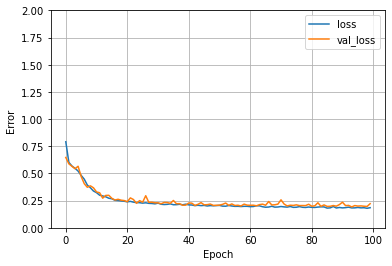

In [717]:
plot_loss(history)

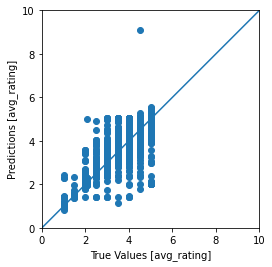

In [718]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [avg_rating]')
plt.ylabel('Predictions [avg_rating]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

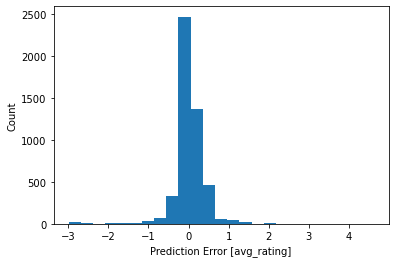

In [719]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [avg_rating]')
_ = plt.ylabel('Count')